In [7]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch, xformers

pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16
).to("cuda")

pipe.enable_xformers_memory_efficient_attention()
pipe.vae.to(dtype=torch.float16)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "A clear highway under blue sky"
image  = pipe(prompt, num_inference_steps=30).images[0]

100%|██████████| 30/30 [00:07<00:00,  3.92it/s]


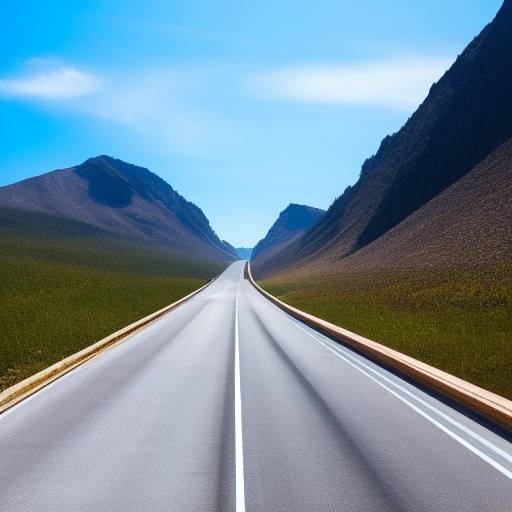

In [8]:
image